In [4]:
#loading all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading csv file
dmp=pd.read_csv("auto-mpg.csv")

In [6]:
dmp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
#checking null values
dmp.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
dmp.drop('car name',axis=1,inplace=True)

In [9]:
dmp.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [10]:
dmp.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [11]:
le=LabelEncoder()
dmp['horsepower']=le.fit_transform(dmp['horsepower'])

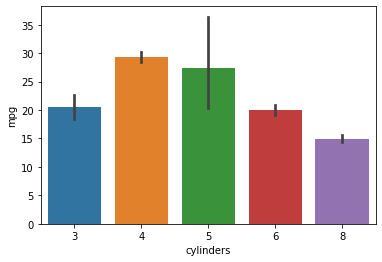

In [12]:
sns.barplot(x="cylinders",y="mpg",data=dmp)

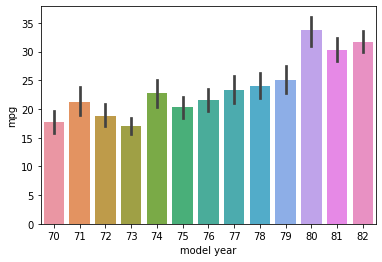

In [13]:
sns.barplot(x="model year",y="mpg",data=dmp)

In [14]:
dmp.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,50.806533,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,29.737225,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,26.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,60.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,78.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,93.000000,5140.000000,24.800000,82.000000,3.000000


mpg                AxesSubplot(0.125,0.772143;0.0945122x0.107857)
cylinders       AxesSubplot(0.238415,0.772143;0.0945122x0.107857)
displacement    AxesSubplot(0.351829,0.772143;0.0945122x0.107857)
horsepower      AxesSubplot(0.465244,0.772143;0.0945122x0.107857)
weight          AxesSubplot(0.578659,0.772143;0.0945122x0.107857)
acceleration    AxesSubplot(0.692073,0.772143;0.0945122x0.107857)
model year      AxesSubplot(0.805488,0.772143;0.0945122x0.107857)
origin             AxesSubplot(0.125,0.642714;0.0945122x0.107857)
dtype: object

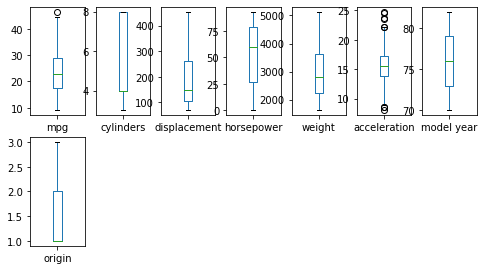

In [15]:
dmp.plot(kind="box",subplots=True,figsize=(8,14),layout=(6,7))

In [16]:
#Lets remove the outliers

z=np.abs(zscore(dmp))
dmp_new=dmp[(z<3).all(axis=1)]

In [17]:
dmp_new.shape

(396, 8)

In [18]:
dmp.shape

(398, 8)

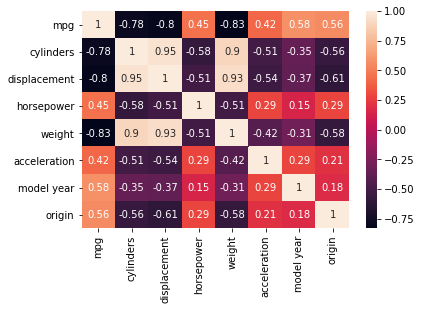

In [19]:
sns.heatmap(dmp.corr(),annot=True)

In [20]:
dmp.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower     -0.316618
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [21]:
x=dmp.iloc[:,1:-1]

In [22]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year
0,8,307.0,15,3504,12.0,70
1,8,350.0,33,3693,11.5,70
2,8,318.0,27,3436,11.0,70
3,8,304.0,27,3433,12.0,70
4,8,302.0,22,3449,10.5,70
...,...,...,...,...,...,...
393,4,140.0,80,2790,15.6,82
394,4,97.0,51,2130,24.6,82
395,4,135.0,78,2295,11.6,82
396,4,120.0,73,2625,18.6,82


In [23]:
#Applying Standardisation as data is skewed

sc=StandardScaler()
x=sc.fit_transform(dmp)
x

array([[-0.7064387 ,  1.49819126,  1.0906037 , ..., -1.29549834,
        -1.62742629, -0.71514478],
       [-1.09075062,  1.49819126,  1.5035143 , ..., -1.47703779,
        -1.62742629, -0.71514478],
       [-0.7064387 ,  1.49819126,  1.19623199, ..., -1.65857724,
        -1.62742629, -0.71514478],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ..., -1.4407299 ,
         1.62198339, -0.71514478],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  1.10082237,
         1.62198339, -0.71514478],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  1.39128549,
         1.62198339, -0.71514478]])

In [24]:
y=dmp.iloc[:,0]

In [25]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [26]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score correspoinding to r_state",r_state ,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print(final_r_state)
print(max_r_score)

r2 score correspoinding to r_state 42 is 1.0
r2 score correspoinding to r_state 43 is 1.0
r2 score correspoinding to r_state 44 is 1.0
r2 score correspoinding to r_state 45 is 1.0
r2 score correspoinding to r_state 46 is 1.0
r2 score correspoinding to r_state 47 is 1.0
r2 score correspoinding to r_state 48 is 1.0
r2 score correspoinding to r_state 49 is 1.0
r2 score correspoinding to r_state 50 is 1.0
r2 score correspoinding to r_state 51 is 1.0
r2 score correspoinding to r_state 52 is 1.0
r2 score correspoinding to r_state 53 is 1.0
r2 score correspoinding to r_state 54 is 1.0
r2 score correspoinding to r_state 55 is 1.0
r2 score correspoinding to r_state 56 is 1.0
r2 score correspoinding to r_state 57 is 1.0
r2 score correspoinding to r_state 58 is 1.0
r2 score correspoinding to r_state 59 is 1.0
r2 score correspoinding to r_state 60 is 1.0
r2 score correspoinding to r_state 61 is 1.0
r2 score correspoinding to r_state 62 is 1.0
r2 score correspoinding to r_state 63 is 1.0
r2 score c

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean absolute error: 3.197442310920451e-15
Mean squared error: 2.256142188932094e-29
Root Mean squared error: 4.7498865133096535e-15
r2_score: 1.0


In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
alphavalue={'alpha':[1,0.1,0.01,0.0001,0.001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.0001, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1.0
0
{'alpha': 0}


In [29]:
ls=Lasso(alpha=0)
ls.fit(x_train,y_train)
y_pred=ls.predict(x_test)
import numpy as np
from sklearn.metrics import r2_score
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root Mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean absolute error: 1.9984014443252818e-16
Mean squared error: 3.549874073494553e-31
Root Mean squared error: 5.958081967793455e-16
r2_score: 1.0


In [30]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=45)
rfr.fit(x_train,y_train)
predrf=rfr.predict(x_test)
print(r2_score(y_test,predrf))

0.9998532537313294


In [31]:
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor(n_estimators=50)
adr.fit(x_train,y_train)
predad=adr.predict(x_test)
print(r2_score(y_test,predad))

0.9968881946641285


In [32]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),Lasso(),RandomForestRegressor(),AdaBoostRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=8,scoring='r2')
    print(score.mean())
    print(score.std())
    print('***************')

1.0
0.0
***************
0.962893285432335
0.02669702881524647
***************
0.993660854041293
0.013760327390211224
***************
0.9841669858767318
0.020920458467953314
***************


In [33]:
#Conclusion:
#After analysing the data i have dropped the car name is unique it doesnt help in analysis so i removed the column  carname
#As horsepower is object datatype i have used labelEncoder to convert into int datatype
#As per the box plot there were outliers present in acceleration and mpg so i have used outliers
#As per the correlation heatmap there were three columns negatively correlating with mpg(target)-cylinders,displacement and weight
#As there is skewness in data i have used standard scaling technique to the data
#As per analysis of models, Logisticregression is the best model for this dataset as it having high r2score and cross val score

In [34]:
joblib.dump(lr,'Model_autompg.csv')

['Model_autompg.csv']

In [35]:
model=joblib.load('Model_autompg.csv')
model.predict(x_test)

array([33. , 28. , 19. , 13. , 14. , 27. , 24. , 13. , 17. , 21. , 15. ,
       38. , 26. , 15. , 25. , 12. , 31. , 17. , 16. , 31. , 22. , 22. ,
       22. , 33.5, 18. , 44. , 26. , 24.5, 18.1, 12. , 27. , 36. , 23. ,
       24. , 37.2, 16. , 21. , 19.2, 16. , 29. , 26.8, 27. , 18. , 10. ,
       23. , 36. , 26. , 25. , 25. , 25. , 22. , 34.1, 32.4, 13. , 23.5,
       14. , 18.5, 29.8, 28. , 19. , 11. , 33. , 23. , 21. , 23. , 25. ,
       23.8, 34.4, 24.5, 13. , 34.7, 14. , 15. , 18. , 25. , 19.9, 17.5,
       28. , 29. , 17. ])

In [36]:
joblib.dump(lr,'lr.autompg.pkl')

['lr.autompg.pkl']